In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')


In [105]:
train = pd.read_csv('sign_mnist_train/sign_mnist_train.csv')
print(train.shape)
train.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [106]:
test = pd.read_csv('sign_mnist_test/sign_mnist_test.csv')
print(test.shape)
test.head()

(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [107]:
X_train = train.drop(labels=["label"],axis=1)
Y_train = train["label"]
print("X_train shape",X_train.shape)
print("Y_train shape",Y_train.shape)

X_test = test.drop(labels=["label"],axis=1)
Y_test = test.iloc[:,0]
print("X_test shape",X_test.shape)
print("Y_test shape",Y_test.shape)

X_train shape (27455, 784)
Y_train shape (27455,)
X_test shape (7172, 784)
Y_test shape (7172,)


In [108]:
#plt.figure(figsize=(15,10))
#g = sns.countplot(Y_train,palette="icefire")
#plt.title("Number Digit")
#Y_train.value_counts()

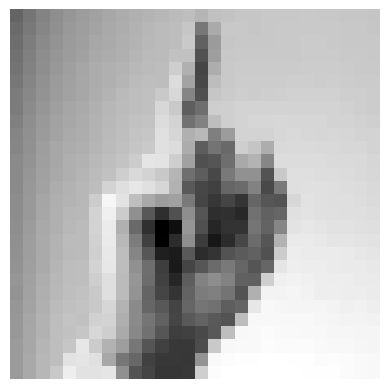

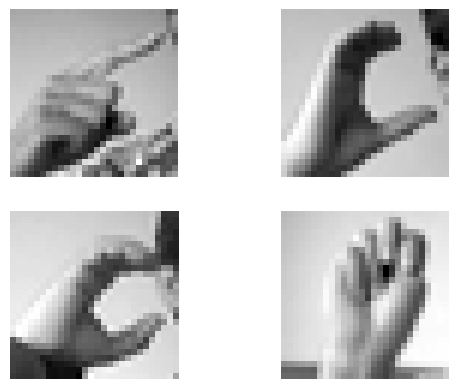

In [109]:
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.show()


plt.subplot(2,2,1)
img1 = X_train.iloc[1].to_numpy().reshape((28,28))
plt.imshow(img1,cmap='gray')
plt.axis('off')

plt.subplot(2,2,2)
img2 = X_train.iloc[2].to_numpy().reshape((28,28))
plt.imshow(img2,cmap='gray')
plt.axis('off')

plt.subplot(2,2,3)
img3 = X_train.iloc[3].to_numpy().reshape((28,28))
plt.imshow(img3,cmap='gray')
plt.axis('off')

plt.subplot(2,2,4)
img4 = X_train.iloc[4].to_numpy().reshape((28,28))
plt.imshow(img4,cmap='gray')
plt.axis('off')
plt.show()

In [110]:
# normalization
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (27455, 784)
test shape:  (7172, 785)


In [111]:
#Reshape
#When we want to reshape our data firstly we need to convert the data to Numpy by using .values method
X_train = X_train.values.reshape(-1,28,28,1) #28x28 >> 784 px
X_test = X_test.values.reshape(-1,28,28,1)
print("X_train shape : ",X_train.shape)
print("Test shape : ",X_test.shape)

X_train shape :  (27455, 28, 28, 1)
Test shape :  (7172, 28, 28, 1)


In [112]:
#label encoding
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train,num_classes = 25)
Y_val = to_categorical(Y_test, num_classes = 25 )

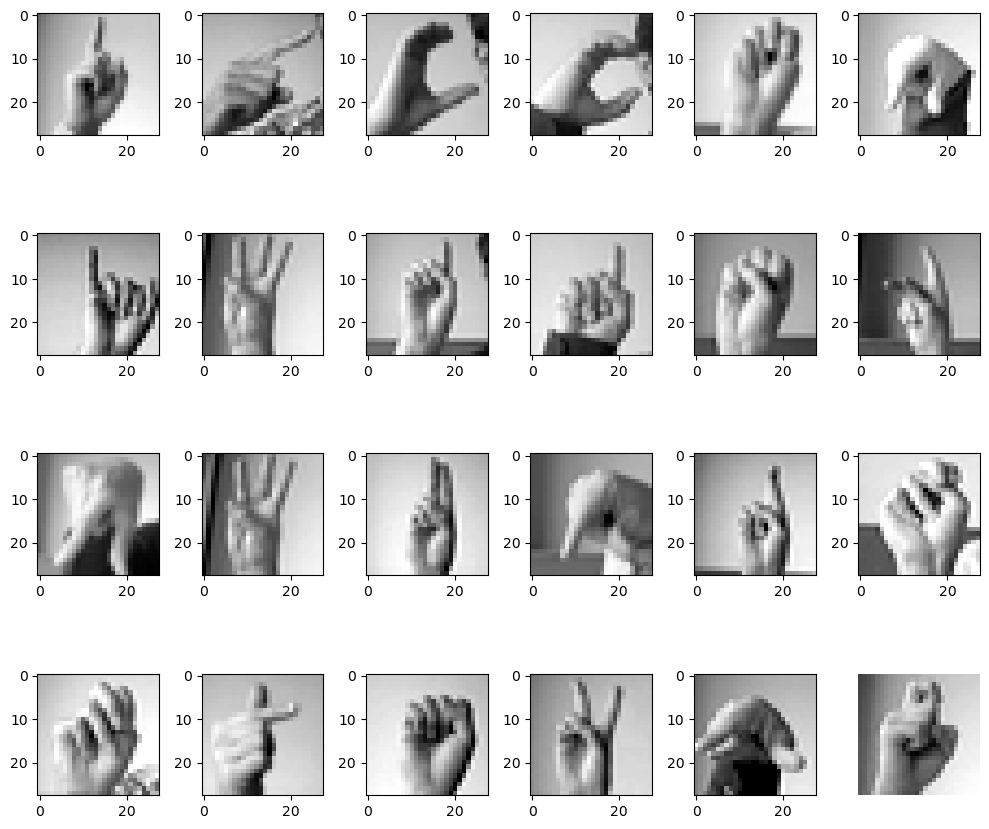

In [113]:
#Lets see all the pictures below
f, ax = plt.subplots(4,6) 
f.set_size_inches(10, 10)
k = 0
for i in range(4):
    for j in range(6):
        ax[i,j].imshow(X_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
        plt.axis("off")
        plt.savefig("paint.png")
    plt.tight_layout()    

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train,test_size = 0.15, random_state = 42)
print("X_train shape",X_train.shape)
print("X_val shape",X_val.shape)
print("Y_train shape",Y_train.shape)
print("Y_val shape",Y_val.shape)

X_train shape (23336, 28, 28, 1)
X_val shape (4119, 28, 28, 1)
Y_train shape (23336, 25)
Y_val shape (4119, 25)


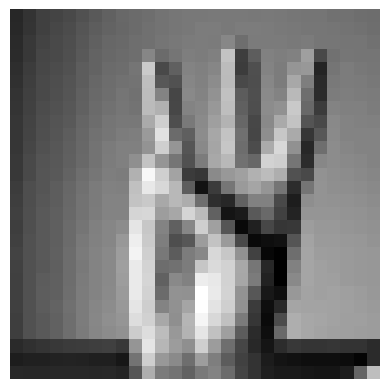

In [115]:
# Bazı örnekler
plt.imshow(X_train[234],cmap='gray')
plt.axis('off')
plt.show()

In [123]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import BatchNormalization

model = Sequential()
model.add(Conv2D(30,(5,5),padding='Same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(30,(5,5),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(30,(5,5),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))


#connected fully
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25,activation='softmax'))   #output

In [124]:
optimizer = Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [131]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [132]:
epochs = 15
batch_size = 250

In [133]:
#Model Summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 28, 28, 30)        780       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 14, 14, 30)       0         
 g2D)                                                            
                                                                 
 batch_normalization_27 (Bat  (None, 14, 14, 30)       120       
 chNormalization)                                                
                                                                 
 dropout_34 (Dropout)        (None, 14, 14, 30)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 14, 14, 30)        22530     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 7, 7, 30)        

In [134]:
# Veri artırma işlemi
datagen = ImageDataGenerator(
        featurewise_center=False,  # veri seti üzerinde giriş ortalamasını 0'a ayarla
        samplewise_center=False,  # her örneğin ortalamasını 0'a ayarla
        featurewise_std_normalization=False,  # veri setinin std ile girişleri böl
        samplewise_std_normalization=False,  # her bir girişi kendi std ile böl
        zca_whitening=False,  # boyut azaltma işlemi
        rotation_range=5,  # görüntüleri rastgele 5 derece döndür
        zoom_range = 0.1, # rastgele görüntüleri %5 zoomla
        width_shift_range=0.1,  # görüntüleri yatayda rastgele %5 kaydır
        height_shift_range=0.1,  # görüntüleri dikeyde rastgele %5 kaydır
        horizontal_flip=False,  # görüntüleri yatayda rastgele çevir
        vertical_flip=False)  # görüntüleri dikeyde rastgele çevirme

datagen.fit(X_train)


In [2]:
history = model.fit(datagen.flow(X_train,Y_train,
                                 batch_size = batch_size),
                                 epochs = epochs, 
                                 validation_data =(X_val,Y_val),
                                 steps_per_epoch = X_train.shape[0]//batch_size,
                                 callbacks = [learning_rate_reduction])

# or

#history = model.fit(datagen.flow(X_train,Y_train,batch_size = batch_size),epochs = epochs, validation_data =(X_val,Y_val),
#steps_per_epoch = X_train.shape[0]//batch_size)


NameError: name 'model' is not defined

In [136]:
score = model.evaluate(X_val,Y_val,verbose = 0)
print("Test Loss : ",score[0])
print("Test Accuracy : ",score[1])

Test Loss :  0.00045245260116644204
Test Accuracy :  1.0
